# Burgers' equation
* Nonlinear convection
* Linear diffusion
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$


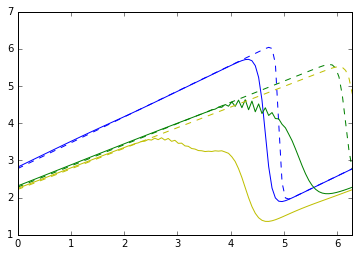

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import time, sys
%matplotlib inline

import sympy as sp
sp.init_printing()
x, nu, t = sp.symbols('x nu t')
phi = sp.exp(-(x-4*t)**2/(4*nu*(t+1))) + sp.exp(-(x-4*t-2*sp.pi)**2/
                                               (4*nu*(t+1)))
phiprime = phi.diff(x)
u = -2*nu*(phiprime/phi)+4
ufunc = sp.utilities.lambdify((t, x, nu), u, "numpy")

def run(nx, NT, nu, color):
    
    x, dx = np.linspace(0,2*np.pi,nx, retstep=True)
    dt = dx*nu
    u = ufunc(0, x, nu)
#     plt.plot(x, u, color+"--", label="init")
    for t in range(NT):
        u_forw = np.roll(u, -1)
        u_back = np.roll(u, 1)
        u = u - u*dt/dx*(u - u_back) + nu*dt/dx**2 *\
            (u_forw - 2*u + u_back)   
            
    plt.plot(x,u, color+"-", label="computational")
    plt.xlim(0,2*np.pi)
    plt.plot(x,ufunc(NT*dt, x, nu), color+"--", label="theory")

run(101,100, 0.07, "b")
run(101,100, 0.12, "g")
run(101,100, 0.128, "y")

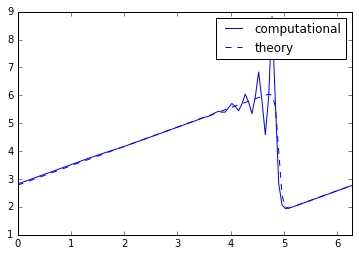

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import time, sys
%matplotlib inline

import sympy as sp
sp.init_printing()
x, nu, t = sp.symbols('x nu t')
phi = sp.exp(-(x-4*t)**2/(4*nu*(t+1))) + sp.exp(-(x-4*t-2*sp.pi)**2/
                                               (4*nu*(t+1)))
phiprime = phi.diff(x)
u = -2*nu*(phiprime/phi)+4
ufunc = sp.utilities.lambdify((t, x, nu), u, "numpy")

def run(nx, NT, nu, color):
    
    x, dx = np.linspace(0,2*np.pi,nx, retstep=True)
    dt = dx*nu
    u = ufunc(0, x, nu)
#     plt.plot(x, u, color+"--", label="init")
    for t in range(NT):
        u_forw = np.roll(u, -1)
        u_back = np.roll(u, 1)
        u = u - u*dt/dx/2*(u_forw - u_back) + nu*dt/dx**2 *\
            (u_forw - 2*u + u_back)   
            
    plt.plot(x,u, color+"-", label="computational")
    plt.xlim(0,2*np.pi)
    plt.plot(x,ufunc(NT*dt, x, nu), color+"--", label="theory")
    plt.legend()

run(101,100, 0.07, "b")